# Stat 133 Lab 11
Xinyang Geng

In [2]:
library(DataComputing)

In this lab, we will use the XML package to read
exchange rates (against the euro) from the 
European Central Bank and create a time 
series plot showing how the rates for four different currencies--the
British pound (GBP), the US dollar (USD), 
the Canadian dollar (CAD), and the Japanese yen (JPY)--have changed over time. Turn in this lab as a .rmd file.


Before jumping to the code portions, open a browser and visit this URL:

[http://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml]("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml")

Examine the structure of the XML. 
What is the exchange rates for the 
British pound (GBP) for 4/8 and 4/7?

* The exchange rate for GBP for 4/8 is **0.8073** , and for 4/7 is **0.80728**.

In [3]:
library(XML)

# Read the data into R
er = xmlTreeParse("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml")

In [4]:
# Get the root node of the XML tree
erRoot = xmlRoot(er)

xmlSize(erRoot)
names(erRoot)

[1] 3

subject    Sender      Cube 
"subject"  "Sender"    "Cube"

We'll extract the exchange rates for the British pound (GBP) as
an example. 
First, we need to understand more about the
structure of this XML tree. 
It looks like all of the data are
descendents of a "Cube" node.

Here, we examine the first child of the Cube node.
If you were to draw a diagram for this tree, with the 
following expression, we would be looking at the following node:

Envelope > Cube > Cube

In [6]:
erRoot[['Cube']][6]

$Cube
<Cube time="2016-04-12">
 <Cube currency="USD" rate="1.1396"/>
 <Cube currency="JPY" rate="123.44"/>
 <Cube currency="BGN" rate="1.9558"/>
 <Cube currency="CZK" rate="27.03"/>
 <Cube currency="DKK" rate="7.4434"/>
 <Cube currency="GBP" rate="0.7984"/>
 <Cube currency="HUF" rate="311.38"/>
 <Cube currency="PLN" rate="4.2923"/>
 <Cube currency="RON" rate="4.4708"/>
 <Cube currency="SEK" rate="9.2138"/>
 <Cube currency="CHF" rate="1.0874"/>
 <Cube currency="NOK" rate="9.3515"/>
 <Cube currency="HRK" rate="7.489"/>
 <Cube currency="RUB" rate="75.6167"/>
 <Cube currency="TRY" rate="3.2274"/>
 <Cube currency="AUD" rate="1.4882"/>
 <Cube currency="BRL" rate="4.0034"/>
 <Cube currency="CAD" rate="1.4674"/>
 <Cube currency="CNY" rate="7.3632"/>
 <Cube currency="HKD" rate="8.8371"/>
 <Cube currency="IDR" rate="14917.84"/>
 <Cube currency="ILS" rate="4.2923"/>
 <Cube currency="INR" rate="75.668"/>
 <Cube currency="KRW" rate="1302.88"/>
 <Cube currency="MXN" rate="20.0248"/>
 <Cube currency=

As we can see, this node is the parent of another node 
named Cube that has a "time" attribute. 
In turn, the Cube node with the "time" attribute node 
is the parent of several other Cube nodes with
"currency" and "rate" attributes. 

We'll show you two ways to pull out the GBP exchange rate. 

First way: Split into two steps.
1. The first is to obtain all of the nodes that have the name "Cube" and an attribute "currency" set to GBP.

We provide getNodeSet() the root node and the XPath
to the nodes we're interested in. 
Provide the predicate in the XPath expression to locate
those Cube nodes with a currency attribute value of "GBP"

In [7]:
gbp_nodes = getNodeSet(erRoot, "//x:Cube[@currency='GBP']", namespaces = "x")

Note we haven't covered namespaces, so don't worry about
the "x:" part in the specification of the path above.

Now for the second step.
2. Use sapply() to get the value of the "rate" 
attribute on those nodes.

In [8]:
gbp1 = sapply(gbp_nodes, xmlGetAttr, "rate")

Let's check it out. Do the values for 4/8 and 4/7
match the value you found by inspection of the XML file?

In [9]:
head(gbp1)
length(gbp1)
class(gbp1)

[1] "0.78975" "0.7978"  "0.79575" "0.7956"  "0.79388" "0.7984"

[1] 62

[1] "character"

ANSWER THE QUESTIONS: 

*Do the values match what you found earlier?*  

* Yes the value match what I found earlier

*How many dates are there?*

* There are 63 dates in total

*What's the correct data type for this vector?*

* The correct data type is numeric but it is a character vecter now. We will fix it later.


The second approach does this all in one step with the
xPathSApply() function.
Note that this function is similarly spelled, 
but xmlSApply() and xpathSApply() are not the same.
The latter provides an XPath expression to specify the
nodes to which the function is applied.

In [10]:
er = xmlTreeParse("http://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml", useInternalNodes = TRUE)
erRoot = xmlRoot(er)
gbp2 = xpathSApply(erRoot, '//x:Cube[@currency="GBP"]', xmlGetAttr, "rate", namespaces = "x")

It is easy to check that these two methods 
produce the same result!

In [12]:
identical(gbp1, gbp2)

[1] TRUE

Now that we've extracted the GBP exchange rate, let's
get the dates associated with each of those values.
YOUR TURN: Fill in the XPAth expression to locate 
all Cube nodes with a time attribute. Remeber to use 
x: in front of the Cube tag name.

In [14]:
days = xpathSApply(erRoot, '//x:Cube[@time]', 
                   xmlGetAttr, "time", namespaces = "x")

Let's take a look at our work and reformat the return
object so that it's a Date object:

In [15]:
head(days)
dayze = as.Date(days)

[1] "2016-04-19" "2016-04-18" "2016-04-15" "2016-04-14" "2016-04-13"
[6] "2016-04-12"

For a quick sanity check: 
did we pull out as many days as there are exchange rates?

In [16]:
length(dayze) == length(gbp1)

[1] TRUE

This should be TRUE.


Great! Now we've successfully extracted the exchange rates
and dates for the British pound. We can create our first
simple plot.

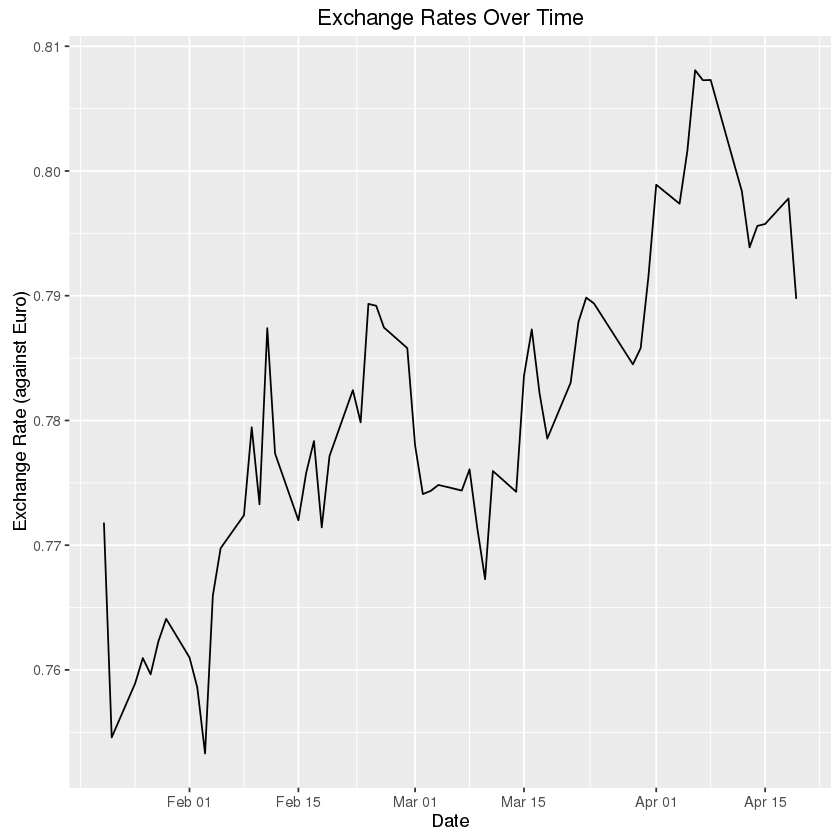

In [17]:
# Recall gbp1 is a character vector; let's fix that now
gbp = as.numeric(gbp1)

df <- data.frame(dayze,gbp)
# Let's plot the GBP exchange rate vs time. 
df %>% ggplot(aes(x=dayze,y=gbp)) +
    geom_line() +
    labs(title="Exchange Rates Over Time",x="Date",y="Exchange Rate (against Euro)")


# Extract rates for three other currencies

We gave you an example with the British pound. Now, we extract the exchange rates for other
currencies and add it to the line plot we just created.

Rather than repeating code, we write a helper function to
do the extraction. This function takes the root node
of the XML document, the three letter currency 
abbreviation as a character string, and an argument
that specifies the number of days that should be present
in the document.
It returns a numeric vector with the daily exchange rates
for the associated currency.

In [19]:
getExchangeRates = function(abbrev,root, numDays = NULL ){
  # get rates
  currency_path = sprintf('//x:Cube[@currency="%s"]', 
                          abbrev)
  rates = xpathSApply(root, currency_path,
                      xmlGetAttr, "rate", namespaces = "x")
  
  # format as numeric vector:
  rates = as.numeric(rates)
  
  # Check to see if there are any missing rates. 
  # print a warning
  if (!is.null(numDays)) {
    if(length(rates) != numDays) {
      warning("Incorrect number of dates!")
      }
  }  
  return(rates)
}

Apply your function to get the exchange rates for 
the GBP, USD, CAD, and JPY.  Fill in the following
call to lapply:

In [20]:
currencies = mapply(getExchangeRates, 
                    abbrev = c("GBP", "USD", "CAD", "AUD"),
                    root = erRoot, 
                    numDays = length(dayze),
                    SIMPLIFY = FALSE)

Now we are ready to make our plot!

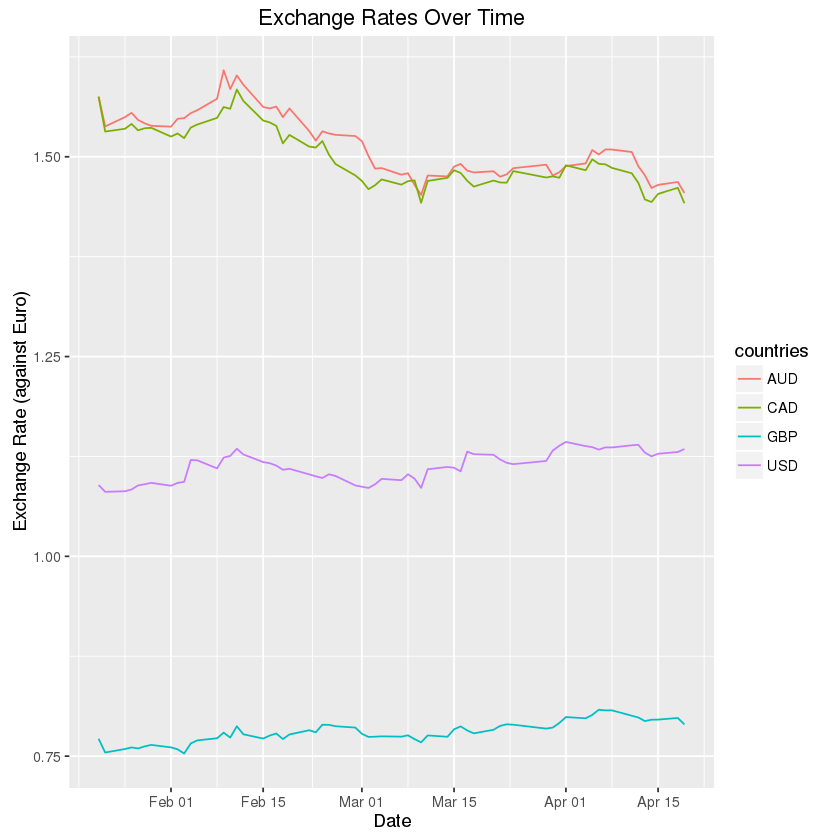

In [22]:
# Find the range of these exchange rates
rateMin = min(sapply(currencies, min))
rateMax = max(sapply(currencies, max))
rateRange = c(rateMin, rateMax)

df_wide <- data.frame(dayze,GBP=currencies[[1]],USD=currencies[[2]],CAD=currencies[[3]],AUD=currencies[[4]])
df <- df_wide %>% gather(key=countries, value=rate, GBP,USD, CAD, AUD)
df %>% ggplot(aes(x=dayze,y=rate, col=countries)) +
    geom_line() +
    labs(title="Exchange Rates Over Time",x="Date",y="Exchange Rate (against Euro)")
  